In [10]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt


plt.rcParams.update({'font.size': 16})

In [11]:
def clean_data(path):
    df = pd.read_csv(path)
    df.dropna(inplace=True)
    phone_df = pd.get_dummies(df['phone'])
    city_df = pd.get_dummies(df['city'])
    df['Astapor'] = city_df['Astapor']
    df["King's Landing"] = city_df["King's Landing"]
    df['Winterfell'] = city_df['Winterfell']
    df['Android'] = phone_df['Android']
    df['iPhone'] = phone_df['iPhone']
    df.drop('city',axis=1,inplace=True)
    df['signup_date'] = pd.to_datetime(df['signup_date'])
    df['day_of_week'] = df['signup_date'].apply(lambda x: x.dayofweek)
    df['signup_weekend'] = df['day_of_week'].apply(lambda x: x > 4)
    df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
    df['churn'] = df['last_trip_date'].apply(lambda x: x < pd.to_datetime('2014-06-01')).astype(int)
    df['luxury_car_user'] = df['luxury_car_user']*1
    df['signup_weekend'] = df['signup_weekend']*1
    df['avg_total_rating'] = df['avg_rating_by_driver'] + df['avg_rating_of_driver']
    df.drop(columns = ['Astapor', 'last_trip_date', 'signup_date', 'day_of_week'],inplace=True)
    return df

In [13]:
df = clean_data('ride-share/data/churn.csv')

In [17]:
df['trips_in_first_30_days'].describe()

count    41445.000000
mean         2.609675
std          4.059336
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        125.000000
Name: trips_in_first_30_days, dtype: float64

In [4]:
df['trips_in_first_30_days'].describe()

NameError: name 'df' is not defined

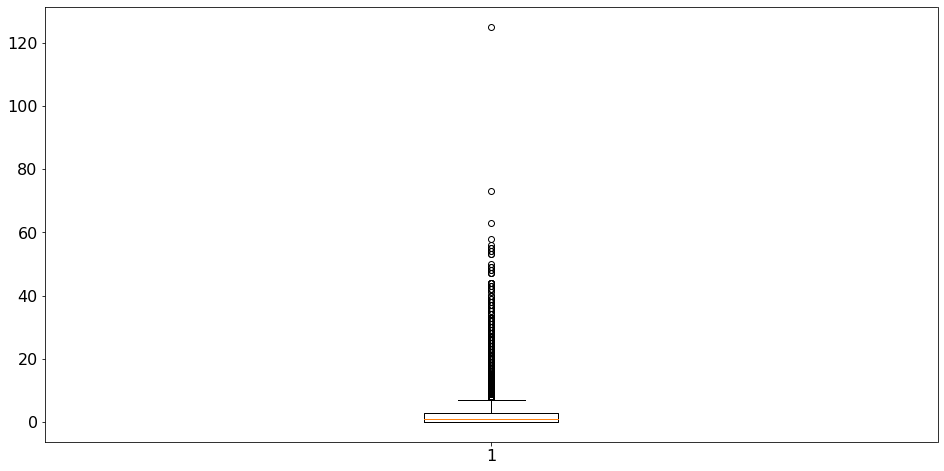

In [45]:
fig,ax = plt.subplots(figsize=(16,8))
bp = ax.boxplot(df['trips_in_first_30_days'])
plt.show()

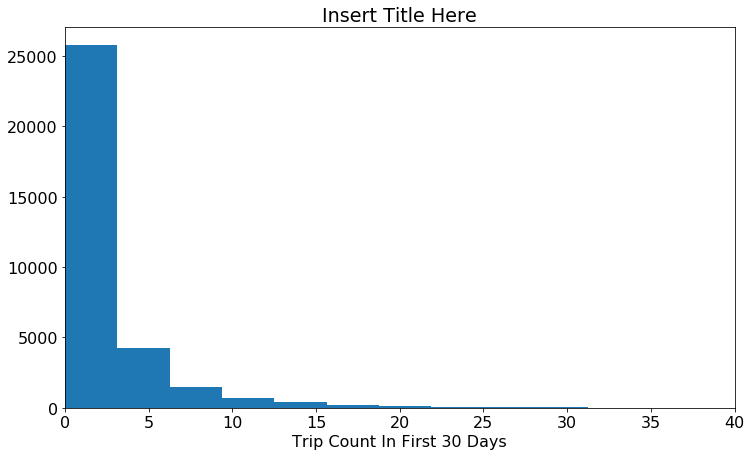

In [117]:
data_to_plot = [df['trips_in_first_30_days']]
fig,ax =plt.subplots(figsize = (12,7))
ax.hist(data_to_plot,bins=40)
ax.set_xlabel('Trip Count In First 30 Days')
ax.set_title('Insert Title Here')
plt.xlim(0,40)
plt.show()

In [101]:
x = (np.arange(0, 1, step=0.2))

In [102]:
x

array([0. , 0.2, 0.4, 0.6, 0.8])

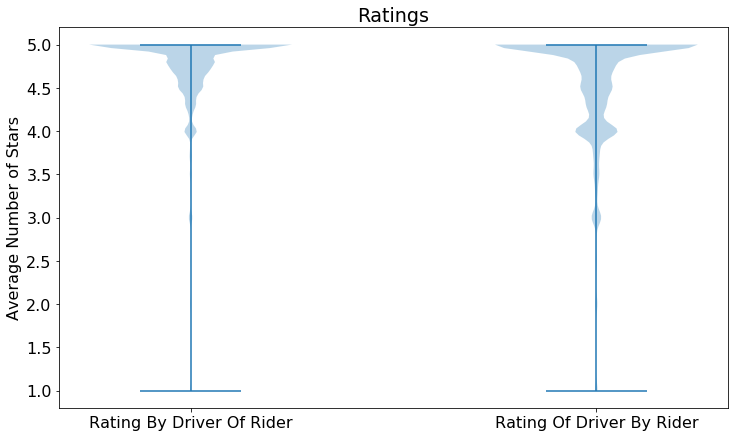

In [116]:
data_to_plot = [df['avg_rating_by_driver'], df['avg_rating_of_driver']]
fig,ax = plt.subplots(figsize=(12,7))
ax.set_title('Ratings')
ax.set_ylabel('Average Number of Stars')
ax.violinplot(data_to_plot)
plt.xticks(np.arange(1,3),['Rating By Driver Of Rider','Rating Of Driver By Rider'])
plt.show()


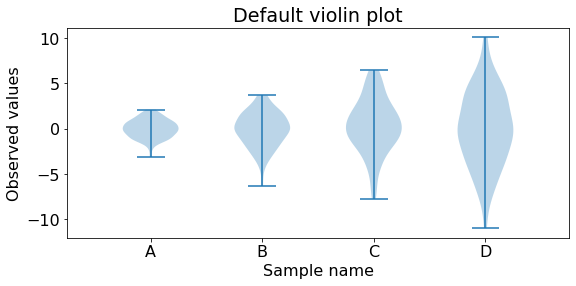

In [83]:
import matplotlib.pyplot as plt
import numpy as np


def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Sample name')


# create test data
np.random.seed(19680801)
data = [sorted(np.random.normal(0, std, 100)) for std in range(1, 5)]

fig,ax1 = plt.subplots(figsize=(9, 4), sharey=True)

ax1.set_title('Default violin plot')
ax1.set_ylabel('Observed values')
ax1.violinplot(data)

ax2.set_title('Customized violin plot')
parts = ax2.violinplot(
        data, showmeans=False, showmedians=False,
        showextrema=False)

for pc in parts['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(1)

quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data, quartile1, quartile3)])
whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(1, len(medians) + 1)
ax2.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
ax2.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax2.vlines(inds, whiskersMin, whiskersMax, color='k', linestyle='-', lw=1)

# set style for the axes
labels = ['A', 'B', 'C', 'D']
for ax in [ax1, ax2]:
    set_axis_style(ax, labels)

plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.show()